In [1]:
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt
import spacy
import math
import os
import statsmodels.api as sm

from src.utils import *
from src.data_preprocessing import *
from src.data_processing import *
from src.feature_selection import *
from src.modelisation_arcticle_1 import *
from src.modelisation_arcticle_2 import *

os.chdir('/Users/ismailakrout/Desktop/python/NLP_statapp')

pd.set_option("display.max_columns", None)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ismailakrout/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ismailakrout/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# pour ne pas charger le NB avec des warnings 
import warnings 
warnings.filterwarnings('ignore')

## Pour les journaux

In [3]:
df_daily_express = pd.read_csv('00. input/new_bigfive_DailyExpress_with_sentibert_post2010.csv', encoding='utf-8')
df_the_guardian = pd.read_csv('00. input/newSplit_topics_bigfive_theGuardian_with_sentibert_post2010.csv', encoding='utf-8')

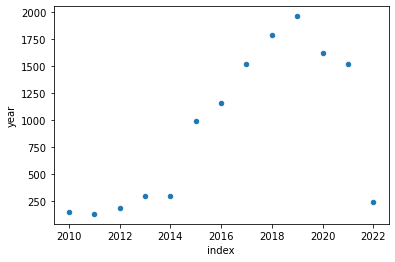

In [4]:
aux_graphique_daily = pd.DataFrame(df_daily_express['year'].value_counts()).reset_index().sort_values(by=['index'])
aux_graphique_daily.plot(x='index', y='year', kind='scatter')
plt.show()

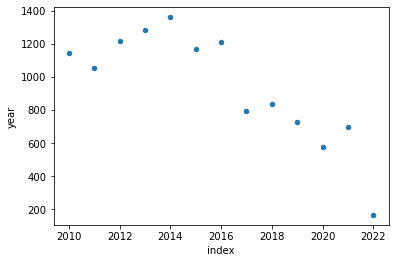

In [5]:
aux_graphique_guardian = pd.DataFrame(df_the_guardian['year'].value_counts()).reset_index().sort_values(by=['index'])
aux_graphique_guardian.plot(x='index', y='year', kind='scatter')
plt.show()

In [6]:
df_daily_express = df_daily_express[['year', 'fulltext']]
df_daily_express['party'] = 'Con'


In [7]:
df_the_guardian = df_the_guardian[['year', 'fulltext']]
df_the_guardian['party'] = 'Lab'


In [8]:
df = pd.concat([df_daily_express, df_the_guardian])
df.rename(columns={
    'fulltext': 'text'
}, inplace=True)

In [9]:
df = df.sample(frac=1)[:100]

In [10]:
# il faut une minute pour 1000 lignes
# donc il me faudra 30 minutes pour faire tourner avec toute la base 
# puis je fais le calcul des fréquences
 
df['text'] = df['fulltext'].apply(clean, args=('bigram',))


In [14]:
df

,year,fulltext,party_dummy,party,text
10983,2021,Vikings is a historical drama that holds some ...,Con,NaN,"[vike histor, histor drama, drama hold, hold t..."
1569,2015,The 31-year-old entrepreneur announced the new...,Con,NaN,"[yearold entrepreneur, entrepreneur announc, a..."
11938,2021,Tesco is fighting back against Amazon with its...,NaN,Lab,"[tesco fight, fight back, back amazon, amazon ..."
1636,2011,Someone tweeting about a nasty cold or updatin...,NaN,Lab,"[someon tweet, tweet nasti, nasti cold, cold u..."
8447,2019,The 2019/20 season marks the first time Amazon...,Con,NaN,"[season mark, mark first, first time, time ama..."
...,...,...,...,...,...
11468,2021,\n New Zealand Prime Minister Jacinda Arder...,Con,NaN,"[new zealand, zealand prime, prime minist, min..."
3589,2017,The final Xbox Scorpio price and release date ...,Con,NaN,"[final xbox, xbox scorpio, scorpio price, pric..."
6673,2019,Google Maps Street View is something many peop...,Con,NaN,"[googl map, map street, street view, view some..."
7257,2019,The new Google Pixel 3a already offers some se...,Con,NaN,"[new googl, googl pixel, pixel alreadi, alread..."


In [12]:
df_freqs_Con = count_freqs(df, 'Con')
df_freqs_Lab = count_freqs(df, 'Lab')
df_freqs = merge_freq(df_freqs_Con, df_freqs_Lab)

KeyError: 'Con'

In [19]:
df_freqs

,words,freq_Con,freq_Lab
0,hon friend,665.0,265.0
1,right hon,341.0,112.0
2,hon gentleman,325.0,177.0
3,hon member,240.0,188.0
4,friend member,205.0,107.0
...,...,...,...
116911,alarm uncertainti,NaN,1.0
116912,uncertainti among,NaN,1.0
116913,stakehold industri,NaN,1.0
116914,industri threaten,NaN,1.0
